In [155]:
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

train = pd.read_csv('../train.csv')
test = pd.read_csv('../test.csv')

# EDA

### a. 수치형 변수 상관관계 파악

In [156]:
object_feature = train.select_dtypes(include='object').columns
object_feature, len(object_feature)

(Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
        'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
        'SaleType', 'SaleCondition'],
       dtype='object'),
 43)

In [157]:
numerical_feature = train.select_dtypes(exclude='object').columns
numerical_feature, len(numerical_feature)

(Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
        'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
        'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 38)

In [158]:
train_corr = train[numerical_feature].corr()
train_corr_index = train_corr.index[abs(train_corr['SalePrice']) >= 0.3]

In [159]:
train_corr_index

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

<Axes: >

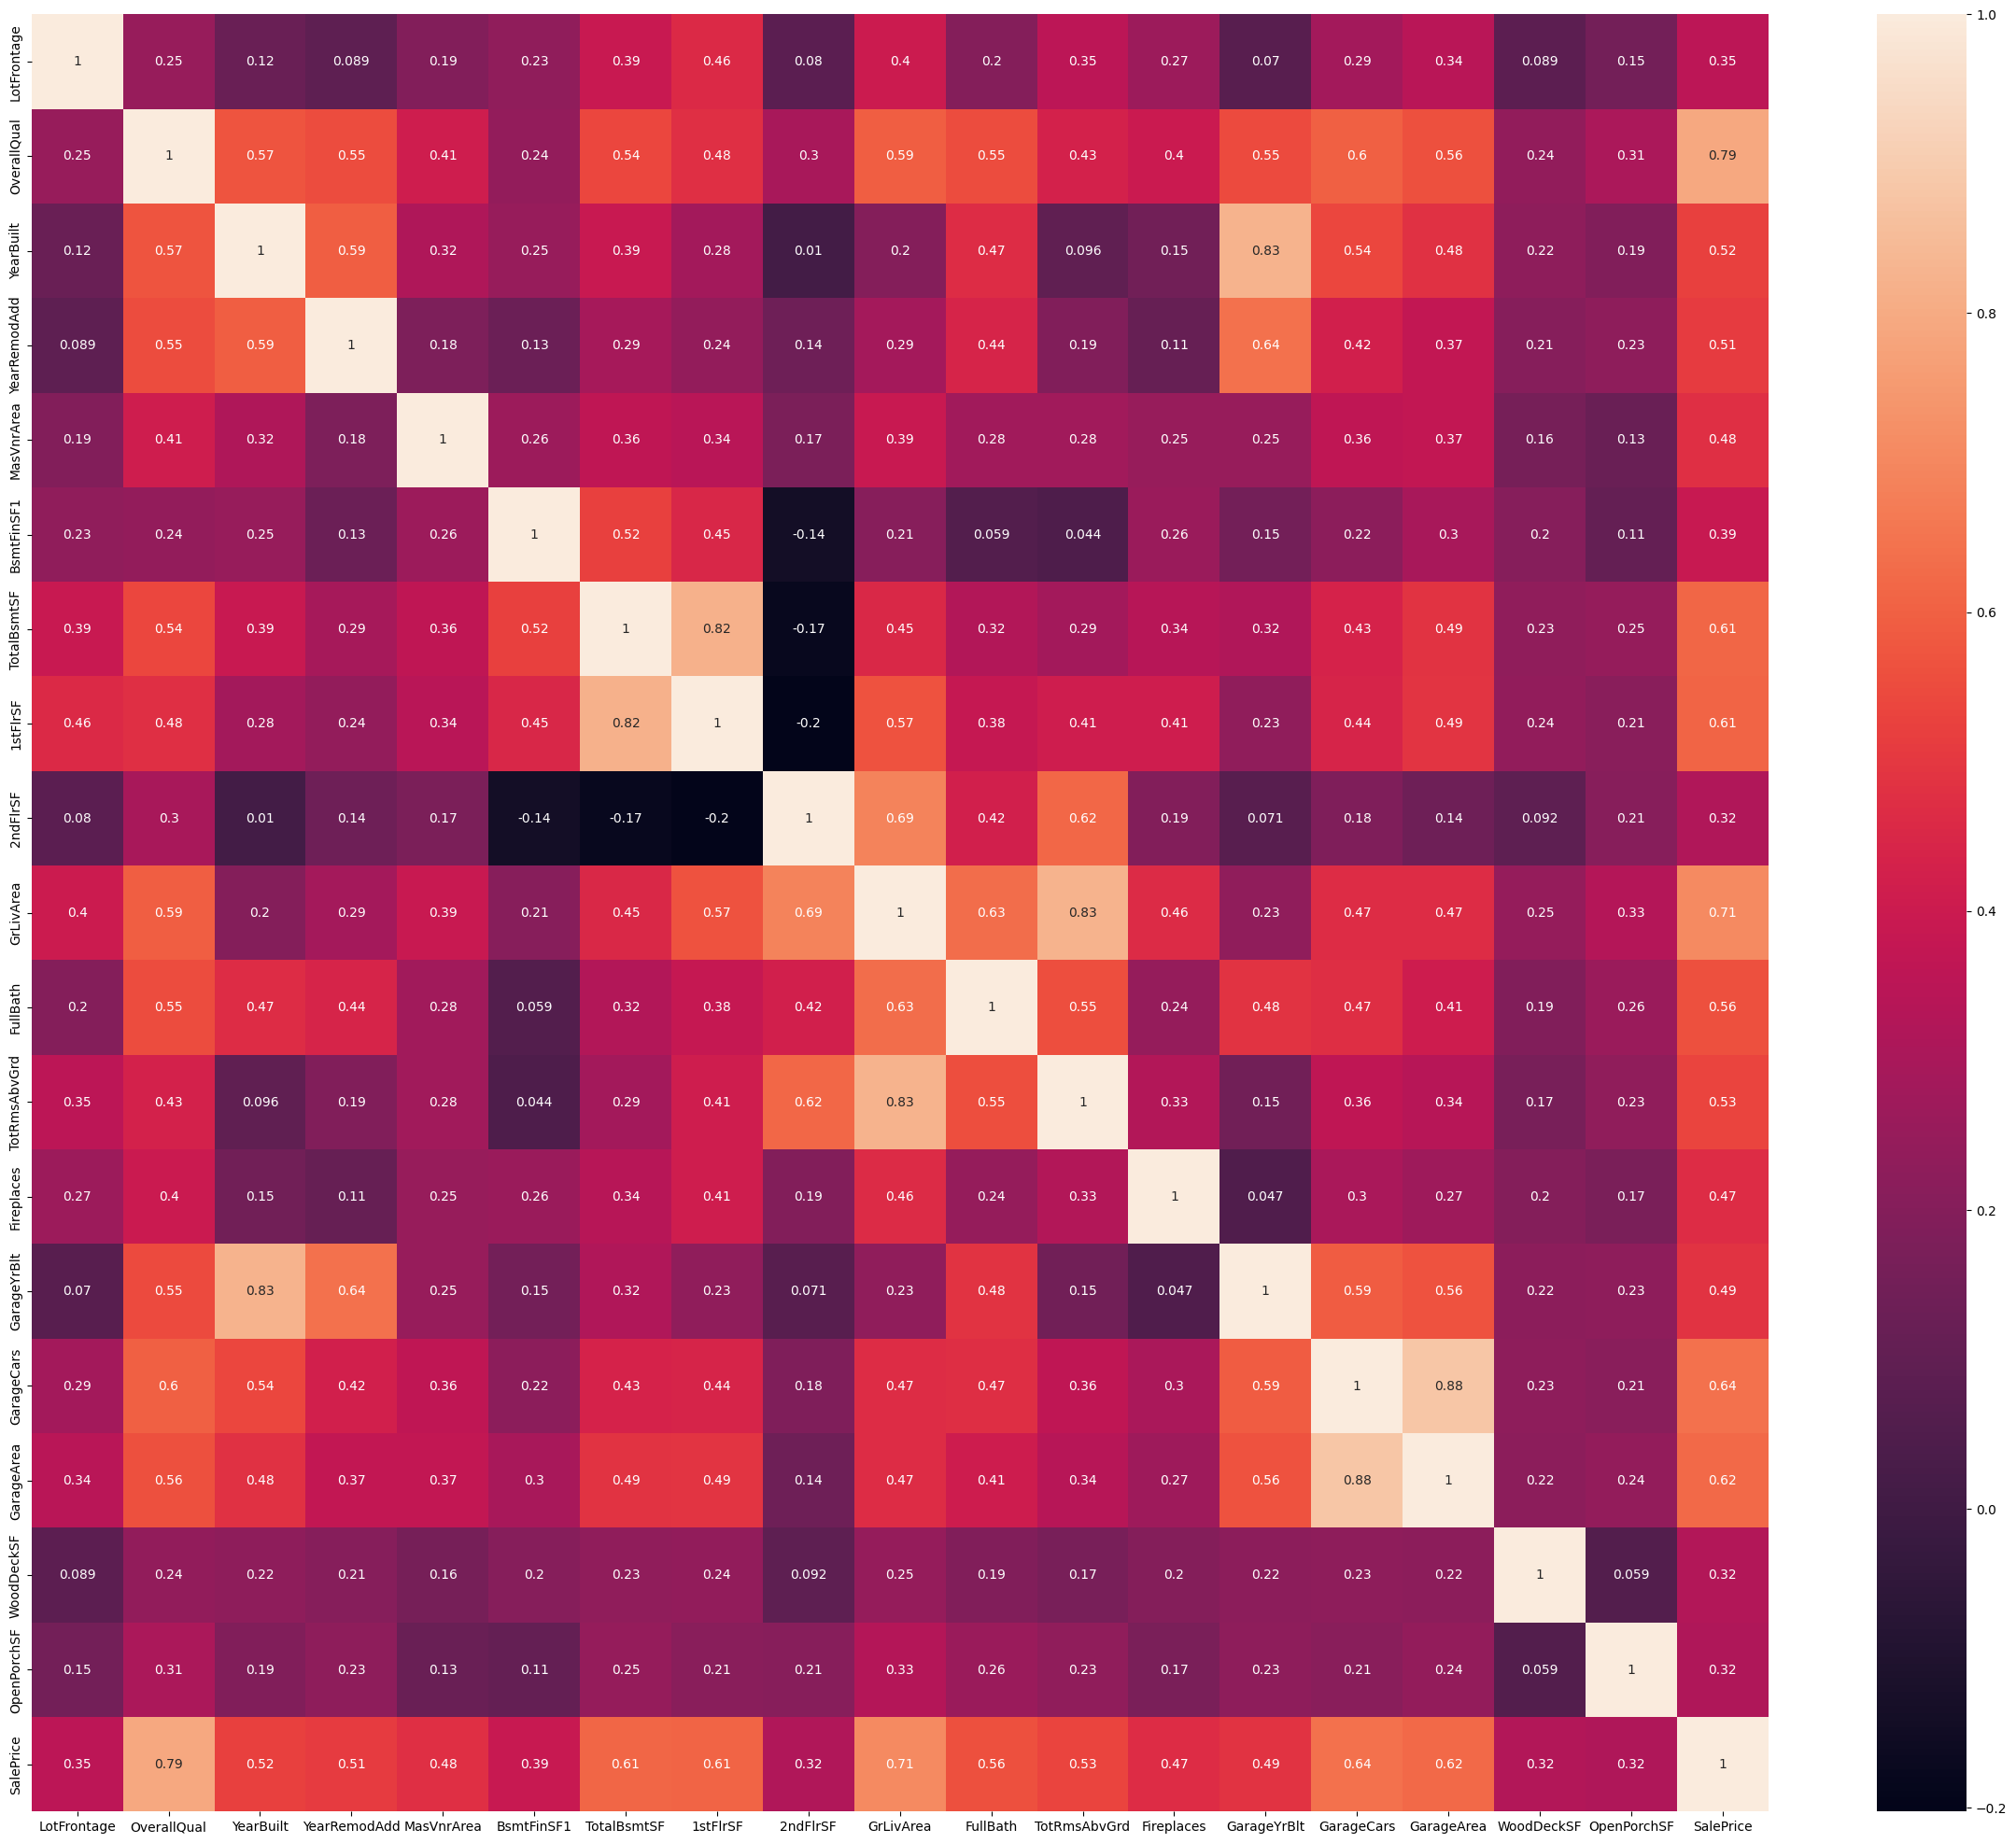

In [160]:
plt.figure(figsize=(30, 25))
sns.heatmap(train[train_corr_index].corr(), annot=True)

### b. 타겟변수 확인

In [161]:
from scipy.stats import norm

C:\Users\hun-1\AppData\Local\Temp\ipykernel_21480\3502691525.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'], fit=norm)


<Axes: xlabel='SalePrice', ylabel='Density'>

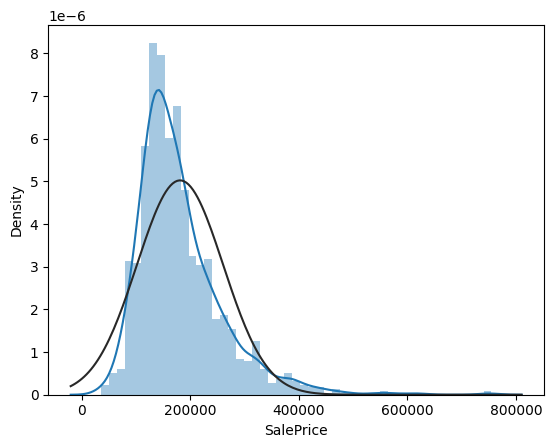

In [162]:
sns.distplot(train['SalePrice'], fit=norm)

In [163]:
train['SalePrice'] = np.log1p(train['SalePrice'])

C:\Users\hun-1\AppData\Local\Temp\ipykernel_21480\3502691525.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'], fit=norm)


<Axes: xlabel='SalePrice', ylabel='Density'>

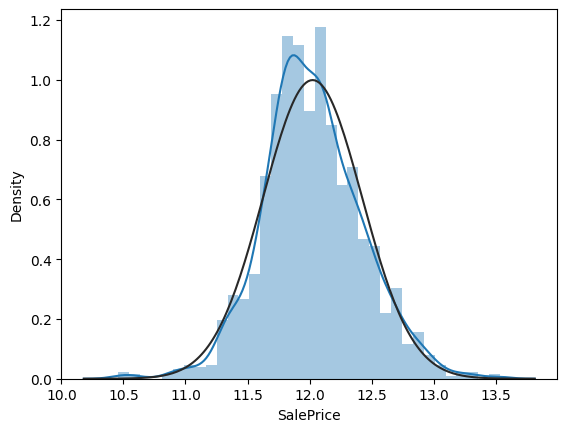

In [164]:
sns.distplot(train['SalePrice'], fit=norm)

# Data Preprocessing

### a. 결측치 처리

In [165]:
numerical_feature, object_feature

(Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
        'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
        'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    

In [166]:
null_train = train.isnull().sum().sort_values(ascending=False)
null_train[:19]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [167]:
null_test = test.isnull().sum().sort_values(ascending=False)
null_test[:33]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageFinish      78
GarageQual        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
Exterior1st        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
SaleType           1
KitchenQual        1
GarageCars         1
GarageArea         1
Exterior2nd        1
dtype: int64

In [168]:
null_train_data = []
null_test_data = []

for value in null_train[:19].values:
    null_train_data.append(f'{value / train.shape[0] * 100: .2f}')

for value in null_test[:33].values:
    null_test_data.append(f'{value / test.shape[0] * 100: .2f}')

In [169]:
null_train_DF = pd.DataFrame(data=null_train_data, index=null_train[:19].index, columns=['train_MissingRatio'])
null_test_DF = pd.DataFrame(data=null_test_data, index=null_test[:33].index, columns=['test_MissingRatio'])

In [170]:
null_train_DF

,train_MissingRatio
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
MasVnrType,59.73
FireplaceQu,47.26
LotFrontage,17.74
GarageQual,5.55
GarageFinish,5.55
GarageType,5.55


In [171]:
null_test_DF

,test_MissingRatio
PoolQC,99.79
MiscFeature,96.50
Alley,92.67
Fence,80.12
MasVnrType,61.27
FireplaceQu,50.03
LotFrontage,15.56
GarageYrBlt,5.35
GarageCond,5.35
GarageFinish,5.35


<Axes: title={'center': 'train missing ratio'}, xlabel='train_feature', ylabel='missing counts'>

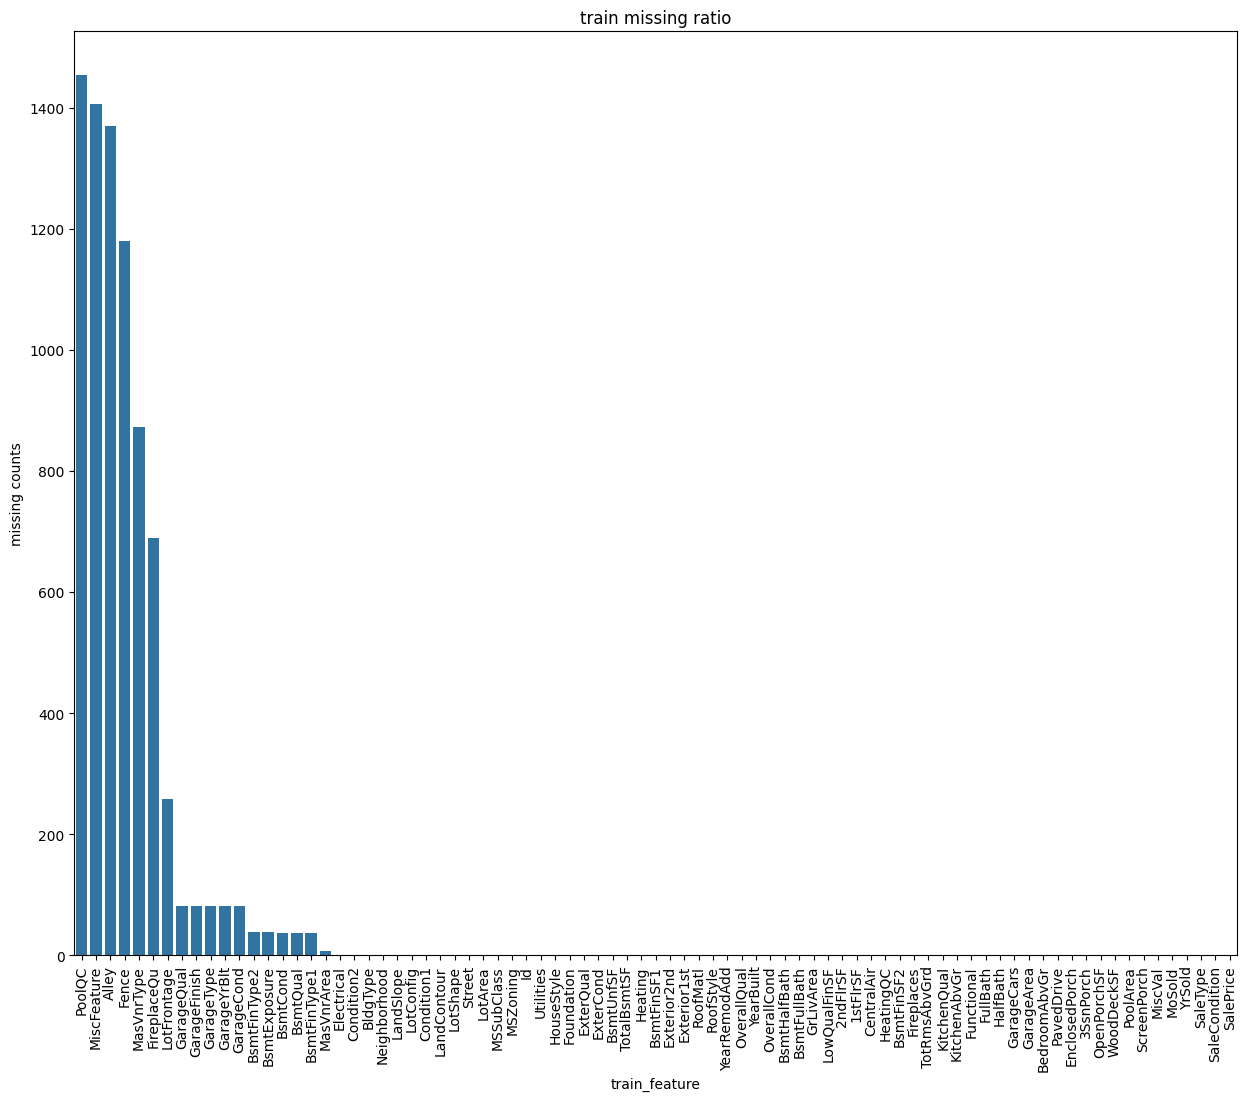

In [172]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation=90)
plt.xlabel('train_feature')
plt.ylabel('missing counts')
plt.title('train missing ratio')
sns.barplot(x=null_train.index, y=null_train)

<Axes: title={'center': 'test missing ratio'}, xlabel='test_feature', ylabel='missing counts'>

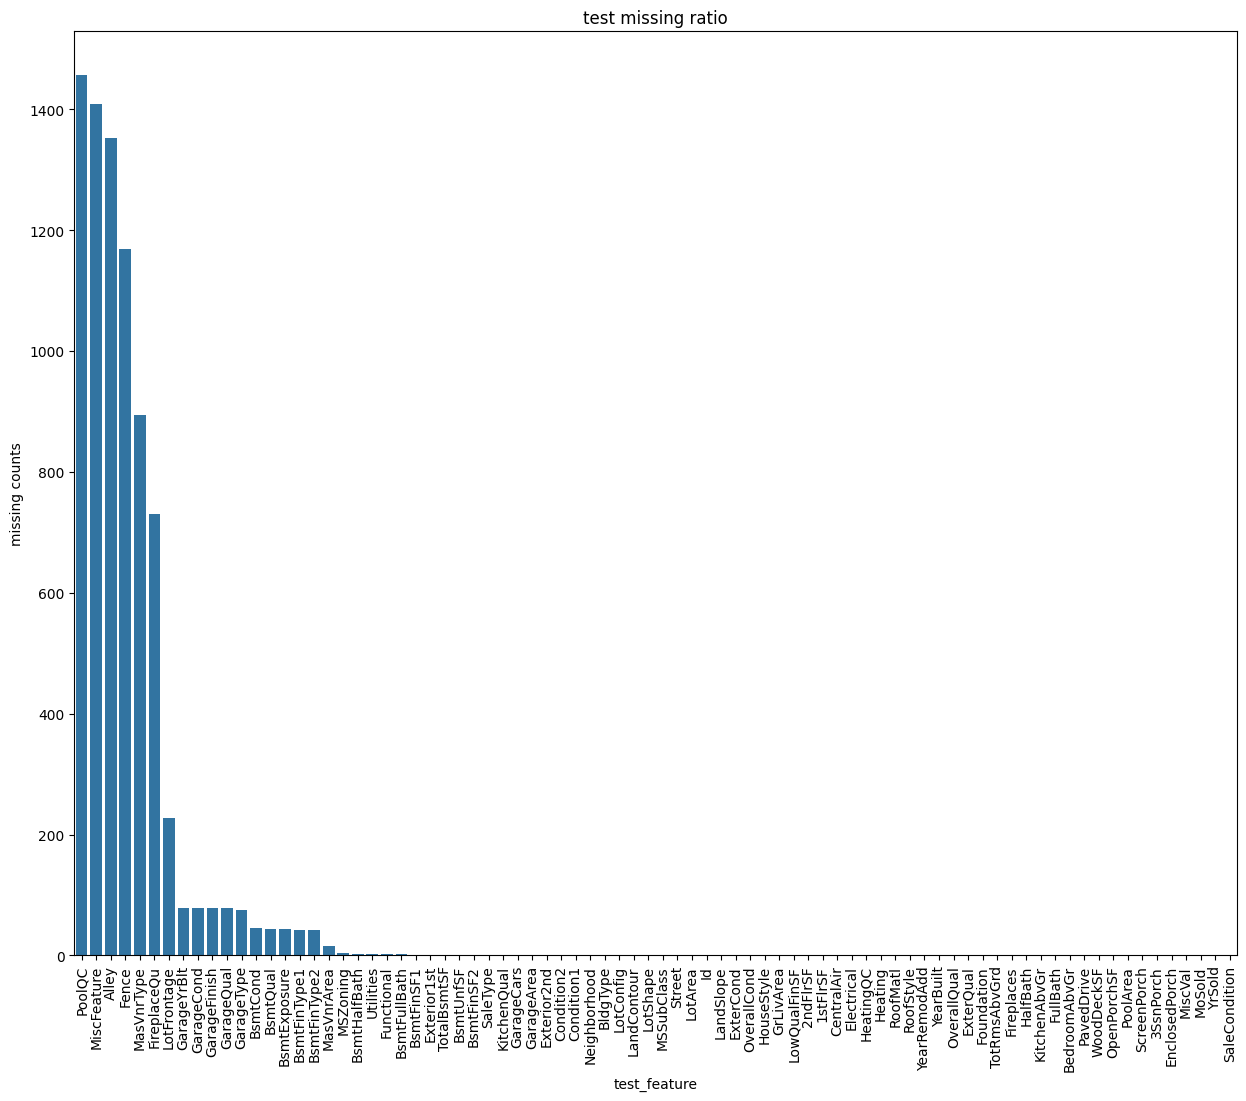

In [173]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xlabel('test_feature')
plt.ylabel('missing counts')
plt.title('test missing ratio')
plt.xticks(rotation=90)
sns.barplot(x=list(null_test.index), y=null_test)

In [174]:
train['PoolQC'] = train['PoolQC'].fillna('None')
test['PoolQC'] = test['PoolQC'].fillna('None')

In [175]:
train['MiscFeature'] = train['MiscFeature'].fillna('None')
test['MiscFeature'] = test['MiscFeature'].fillna('None')

In [176]:
train['Alley'] = train['Alley'].fillna('None')
test['Alley'] = test['Alley'].fillna('None')

In [177]:
train['Fence'] = train['Fence'].fillna('None')
test['Fence'] = test['Fence'].fillna('None')

In [178]:
train['MasVnrType'] = train['MasVnrType'].fillna('None')
test['MasVnrType'] = test['MasVnrType'].fillna('None')

In [179]:
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')
test['FireplaceQu'] = test['FireplaceQu'].fillna('None')

In [180]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())
test['LotFrontage'] = test['LotFrontage'].fillna(train['LotFrontage'].median())

In [181]:
train['GarageQual'] = train['GarageQual'].fillna('None')
test['GarageQual'] = test['GarageQual'].fillna('None')

In [182]:
train['GarageFinish'] = train['GarageFinish'].fillna('None')
test['GarageFinish'] = test['GarageFinish'].fillna('None')

In [183]:
train['GarageType'] = train['GarageType'].fillna('None')
test['GarageType'] = test['GarageType'].fillna('None')

In [184]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)

In [185]:
train['GarageCond'] = train['GarageCond'].fillna('None')
test['GarageCond'] = test['GarageCond'].fillna('None')

In [186]:
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('None')
test['BsmtFinType2'] = test['BsmtFinType2'].fillna('None')

In [187]:
train['BsmtExposure'] = train['BsmtExposure'].fillna('None')
test['BsmtExposure'] = test['BsmtExposure'].fillna('None')

In [188]:
train['BsmtCond'] = train['BsmtCond'].fillna('None')
test['BsmtCond'] = test['BsmtCond'].fillna('None')

In [189]:
train['BsmtQual'] = train['BsmtQual'].fillna('None')
test['BsmtQual'] = test['BsmtQual'].fillna('None')

In [190]:
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('None')
test['BsmtFinType1'] = test['BsmtFinType1'].fillna('None')

In [191]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)

In [192]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

In [193]:
test['MSZoning'] = test['MSZoning'].fillna(train['MSZoning'].mode()[0])

In [194]:
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(0)

In [195]:
test['Utilities'] = test['Utilities'].fillna(train['Utilities'].mode()[0])

In [196]:
test['Functional'] = test['Functional'].fillna(train['Functional'].mode()[0])

In [197]:
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(0)

In [198]:
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(0)

In [199]:
test['Exterior1st'] = test['Exterior1st'].fillna(train['Exterior1st'].mode()[0])

In [200]:
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(0)

In [201]:
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(0)

In [202]:
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(0)

In [203]:
test['SaleType'] = test['SaleType'].fillna(train['SaleType'].mode()[0])

In [204]:
test['KitchenQual'] = test['KitchenQual'].fillna(train['KitchenQual'].mode()[0])

In [205]:
test['GarageCars'] = test['GarageCars'].fillna(0)

In [206]:
test['GarageArea'] = test['GarageArea'].fillna(0)

In [207]:
test['Exterior2nd'] = test['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])

### b. 수치형 데이터 컬럼 -> 범주형으로 변환 & Feature Engineering
### # 데이터가 수치형인데도 불구하고 밤주형으로 취급해야할 것 같은 해당 데이터의 컬럼 (EX: 년도, 날짜, 등등..)

In [208]:
# Utilities 범주값이 거의 한개이기 때문에, 이는 모델 예측에 도움이 안된다. 따라서 컬럼 제거

In [209]:
numerical_feature = list(numerical_feature)
object_feature = list(object_feature)

train = train.drop(columns='Utilities', axis=1)
test = test.drop(columns='Utilities', axis=1)
object_feature.remove('Utilities')

In [210]:
for row in range(train.shape[0]):
    TotalBsmtFG = train[['TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']].values[row][0]
    TotalBsmtFGOperation = train[['TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']].values[row][1] + train[['TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']].values[row][2] + train[['TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']].values[row][3]
    
    print(TotalBsmtFG, TotalBsmtFGOperation)

# 이걸 통해서'TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'의 초기 결측값이 있었던test,train_set에서의 fillna(0)이 옳은게 증명됨.

856 856
1262 1262
920 920
756 756
1145 1145
796 796
1686 1686
1107 1107
952 952
991 991
1040 1040
1175 1175
912 912
1494 1494
1253 1253
832 832
1004 1004
0 0
1114 1114
1029 1029
1158 1158
637 637
1777 1777
1040 1040
1060 1060
1566 1566
900 900
1704 1704
1484 1484
520 520
649 649
1228 1228
1234 1234
1398 1398
1561 1561
1117 1117
1097 1097
1297 1297
1057 1057
0 0
1088 1088
1350 1350
840 840
938 938
1150 1150
1752 1752
1434 1434
1656 1656
736 736
955 955
794 794
816 816
816 816
1842 1842
384 384
1425 1425
970 970
860 860
1410 1410
780 780
1158 1158
530 530
1370 1370
576 576
1057 1057
1143 1143
1947 1947
1453 1453
747 747
1304 1304
2223 2223
845 845
832 832
1086 1086
840 840
462 462
952 952
672 672
1768 1768
440 440
896 896
1237 1237
1563 1563
1065 1065
384 384
1288 1288
684 684
612 612
1013 1013
990 990
0 0
1235 1235
876 876
1214 1214
824 824
680 680
1588 1588
960 960
458 458
950 950
1610 1610
741 741
0 0
1226 1226
1040 1040
1053 1053
641 641
789 789
793 793
1844 1844
994 994
384 384
1264

In [211]:
# Feature Engineering: OverallQual + OverallCond  /  YearBuilt + YearRemodAdd  / ...

In [212]:
train['Total_OverallQuall&Cond'] = train['OverallQual'] + train['OverallCond']
test['Total_OverallQuall&Cond'] = test['OverallQual'] + test['OverallCond']

train['Total_YearBuilt&YearRemodAdd'] = train['YearBuilt'] + train['YearRemodAdd']
test['Total_YearBuilt&YearRemodAdd'] = test['YearBuilt'] + test['YearRemodAdd']

train['Total_sqr_footage'] = train['BsmtFinSF1'] + train['BsmtFinSF2'] + train['BsmtUnfSF'] + train['1stFlrSF'] + train['2ndFlrSF']
test['Total_sqr_footage'] = test['BsmtFinSF1'] + test['BsmtFinSF2'] + test['BsmtUnfSF'] + test['1stFlrSF'] + test['2ndFlrSF']

train['Total_porch_sf'] = train['OpenPorchSF'] + train['3SsnPorch'] + train['EnclosedPorch'] + train['ScreenPorch'] + train['WoodDeckSF']
test['Total_porch_sf'] = test['OpenPorchSF'] + test['3SsnPorch'] + test['EnclosedPorch'] + test['ScreenPorch'] + test['WoodDeckSF']

numerical_feature.append('Total_OverallQuall&Cond')
numerical_feature.append('Total_YearBuilt&YearRemodAdd')
numerical_feature.append('Total_sqr_footage')
numerical_feature.append('Total_porch_sf')

In [213]:
# 데이터가 수치형인데도 불구하고 밤주형으로 취급해야할 것 같은 해당 데이터의 컬럼 (EX: 년도, 날짜, 등등..)

In [214]:
#OverallQual,OverallCond,MSSubClass,MoSold,YrSold-> value_counts()의 index가 적고 순서, 무선서로 구별 가능하기 떄문에 범주형변수로 변환 가능

In [215]:
train['OverallQual'] = train['OverallQual'].astype(str)
test['OverallQual'] = test['OverallQual'].astype(str)

In [216]:
train['OverallCond'] = train['OverallCond'].astype(str)
test['OverallCond'] = test['OverallCond'].astype(str)

In [217]:
train['MSSubClass'] = train['MSSubClass'].apply(str)
test['MSSubClass'] = test['MSSubClass'].apply(str)

In [218]:
train['MoSold'] = train['MoSold'].apply(str)
test['MoSold'] = test['MoSold'].apply(str)

In [219]:
train['YrSold'] = train['YrSold'].apply(str)
test['YrSold'] = test['YrSold'].apply(str)

In [220]:
numerical_feature.remove('OverallQual')
object_feature.append('OverallQual')
numerical_feature.remove('OverallCond')
object_feature.append('OverallCond')
numerical_feature.remove('MSSubClass')
object_feature.append('MSSubClass')
numerical_feature.remove('MoSold')
object_feature.append('MoSold')
numerical_feature.remove('YrSold')
object_feature.append('YrSold')

In [221]:
# haspool, has2ndfloor, hasgarage, hasbsmt, hasfireplace가 있는지에 대한 컬럼 추가
train['haspool'] = train['PoolArea'].apply(lambda x: str(1) if x > 0 else str(0))
train['has2ndfloor'] = train['2ndFlrSF'].apply(lambda x: str(1) if x > 0 else str(0))
train['hasgarage'] = train['GarageArea'].apply(lambda x: str(1) if x > 0 else str(0))
train['hasbsmt'] = train['TotalBsmtSF'].apply(lambda x: str(1) if x > 0 else str(0))
train['hasfireplace'] = train['Fireplaces'].apply(lambda x: str(1) if x > 0 else str(0))

test['haspool'] = test['PoolArea'].apply(lambda x: str(1) if x > 0 else str(0))
test['has2ndfloor'] = test['2ndFlrSF'].apply(lambda x: str(1) if x > 0 else str(0))
test['hasgarage'] = test['GarageArea'].apply(lambda x: str(1) if x > 0 else str(0))
test['hasbsmt'] = test['TotalBsmtSF'].apply(lambda x: str(1) if x > 0 else str(0))
test['hasfireplace'] = test['Fireplaces'].apply(lambda x: str(1) if x > 0 else str(0))

object_feature.append('haspool')
object_feature.append('has2ndfloor')
object_feature.append('hasgarage')
object_feature.append('hasbsmt')
object_feature.append('hasfireplace')

In [222]:
len(numerical_feature), len(object_feature)

(37, 52)

### c. 종속변수와 독립변수와의 관계성 파악 & 범주형 변수의 인코딩 (라벨, 원핫 인코딩 적용) & 수치형 변수 왜도, 첨도 조회 후 box-cox변환

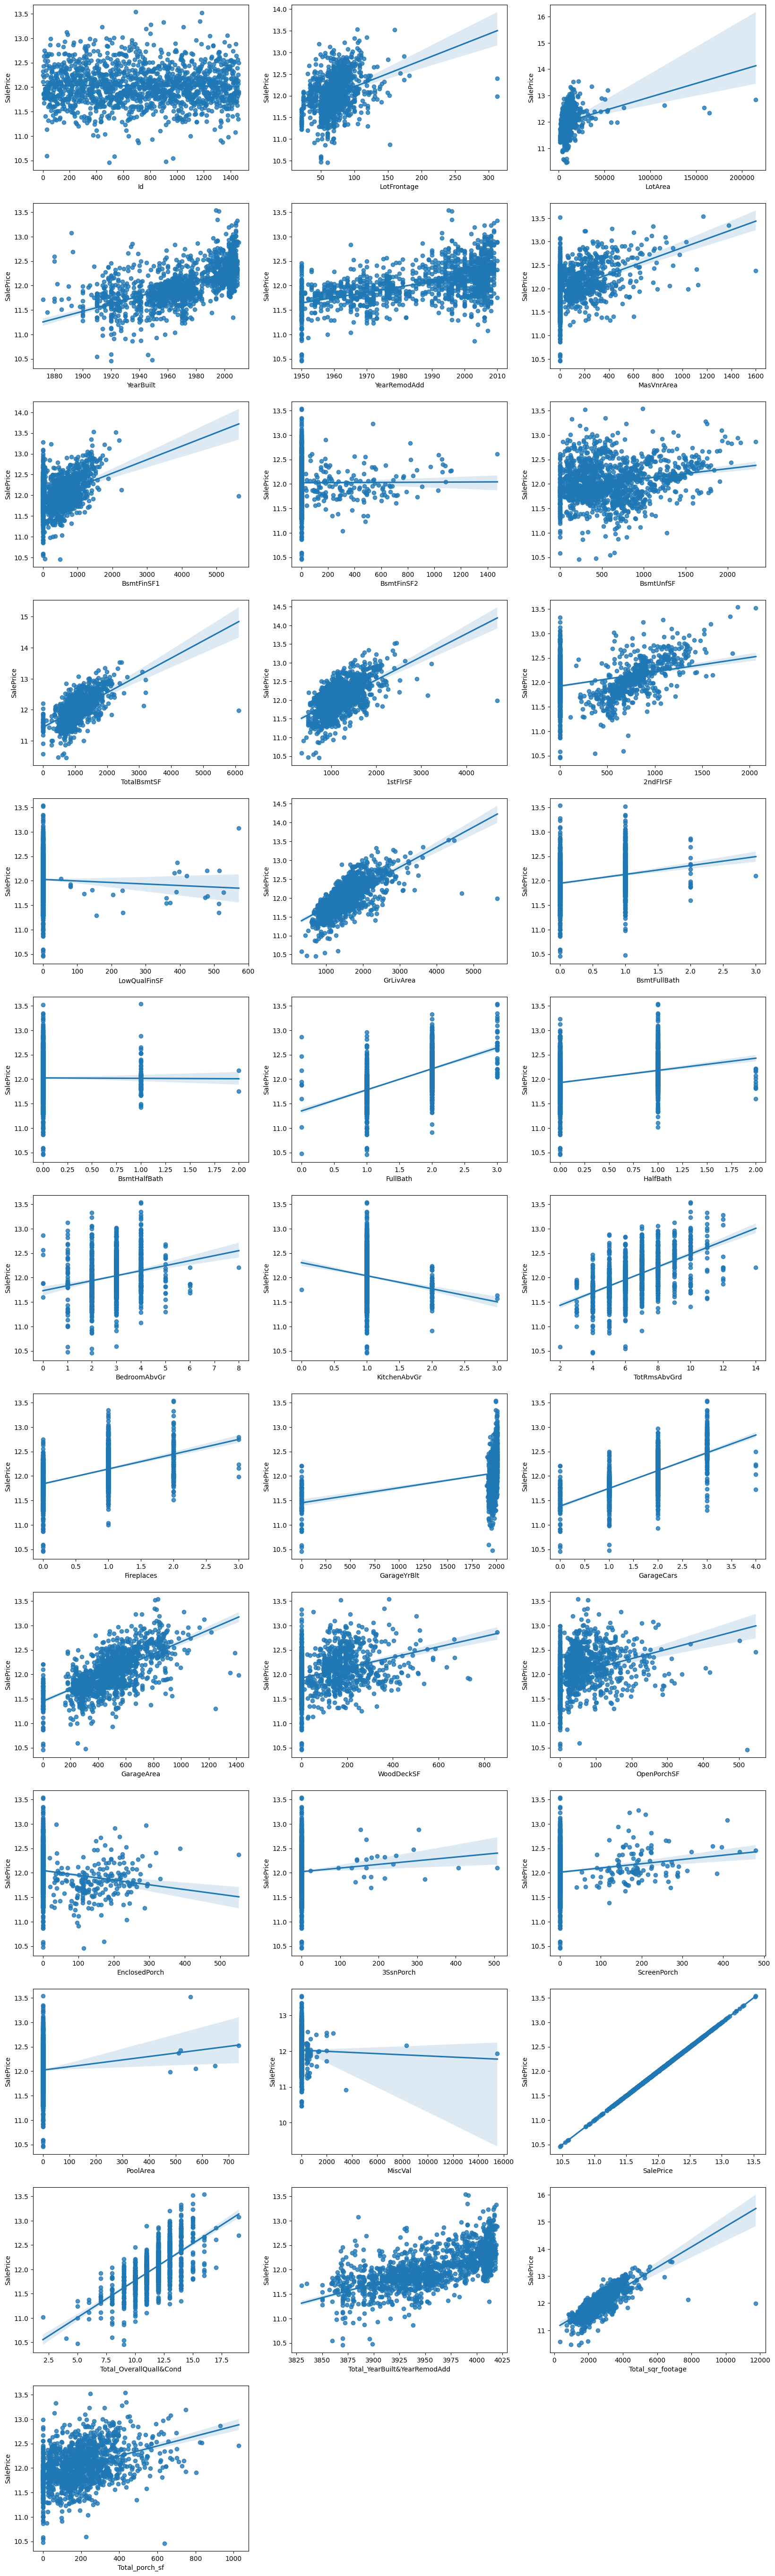

In [223]:
# Id, SalePrice 제외한 -2 값인 35개의 수치형 변수
#numerical_feature.remove('Id')
#numerical_feature.remove('SalePrice')

row = 13
col = 3

f, ax = plt.subplots(nrows=row, ncols=col, figsize=(20, 70))

for i in range(row):
    for j in range(col):
        number = i * col + j  # i * 3 + j 대신 i * col + j가 더 범용적입니다.
        
        # 리스트 인덱스 범위를 벗어나지 않도록 체크
        if number < len(numerical_feature):
            sns.regplot(data=train, x=numerical_feature[number], y='SalePrice', ax=ax[i][j])
        else:
            ax[i][j].axis('off')


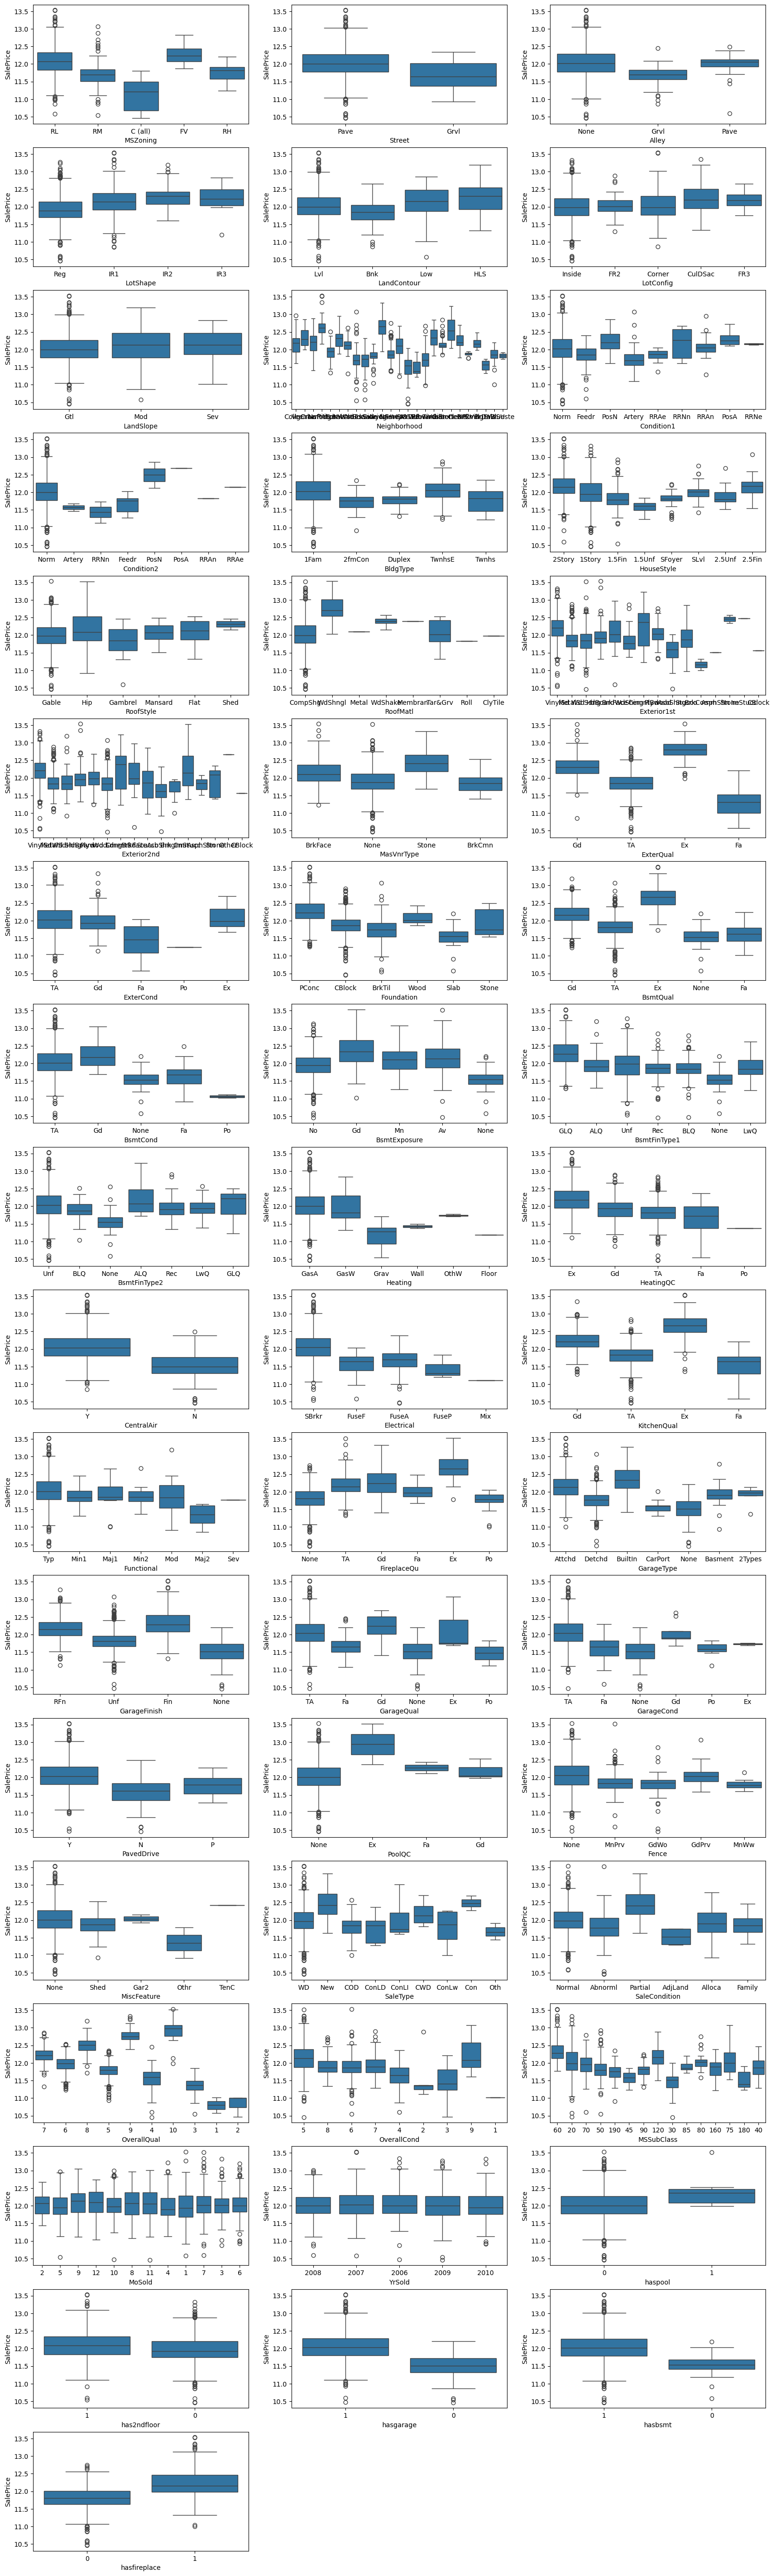

In [224]:
row = 18
col = 3


f, ax = plt.subplots(nrows=row, ncols=col, figsize=(20, 70))


for i in range(row):
    for j in range(col):
        number = i * col + j  # i * 3 + j 대신 i * col + j가 더 범용적입니다.
        
        # 리스트 인덱스 범위를 벗어나지 않도록 체크
        if number < len(object_feature):
            sns.boxplot(data=train, x=object_feature[number], y='SalePrice', ax=ax[i][j])
        else:
            ax[i][j].axis('off')


In [225]:
# 37개 아닌 35개의 수치형 변수(SalePrice, Id 제)의 왜도, 첨도 조회 및 처리
numerical_feature.remove('SalePrice')
numerical_feature.remove('Id')

In [226]:
from scipy.stats import skew 
skewness_train = train[numerical_feature].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness_test = test[numerical_feature].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

high_skewness_train = skewness_train[abs(skewness_train) > 0.5]
skew_feat_train = high_skewness_train.index

high_skewness_test = skewness_test[abs(skewness_test) > 0.5]
skew_feat_test = high_skewness_test.index

print(high_skewness_train)
print(skew_feat_train)

MiscVal              24.451640
PoolArea             14.813135
LotArea              12.195142
3SsnPorch            10.293752
LowQualFinSF          9.002080
KitchenAbvGr          4.483784
BsmtFinSF2            4.250888
ScreenPorch           4.117977
BsmtHalfBath          4.099186
EnclosedPorch         3.086696
MasVnrArea            2.674865
LotFrontage           2.406671
OpenPorchSF           2.361912
Total_sqr_footage     1.774874
BsmtFinSF1            1.683771
WoodDeckSF            1.539792
TotalBsmtSF           1.522688
1stFlrSF              1.375342
GrLivArea             1.365156
Total_porch_sf        1.101180
BsmtUnfSF             0.919323
2ndFlrSF              0.812194
TotRmsAbvGrd          0.675646
HalfBath              0.675203
Fireplaces            0.648898
BsmtFullBath          0.595454
YearRemodAdd         -0.503044
YearBuilt            -0.612831
GarageYrBlt          -3.865524
dtype: float64
Index(['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF',
       'KitchenA

In [227]:
print(high_skewness_test)
print(skew_feat_test)

PoolArea                   20.176117
MiscVal                    20.054543
LowQualFinSF               16.150628
3SsnPorch                  12.511336
EnclosedPorch               4.664371
KitchenAbvGr                4.074860
BsmtFinSF2                  4.038796
ScreenPorch                 3.784349
BsmtHalfBath                3.779085
LotArea                     3.112013
OpenPorchSF                 2.685015
MasVnrArea                  2.546947
WoodDeckSF                  2.128569
Total_porch_sf              1.616050
1stFlrSF                    1.556592
Total_sqr_footage           1.206772
BsmtFinSF1                  1.165130
GrLivArea                   1.129240
BsmtUnfSF                   0.918977
2ndFlrSF                    0.911944
TotRmsAbvGrd                0.841731
Fireplaces                  0.819015
TotalBsmtSF                 0.804238
HalfBath                    0.713993
LotFrontage                 0.709861
BsmtFullBath                0.651195
YearBuilt                  -0.587052
T

In [228]:
# box-cox 변환
from scipy.special import boxcox1p
lam = 0.15
for feat in skew_feat_train:
    train[feat] = boxcox1p(train[feat], lam)

for feat in skew_feat_test:
    test[feat] = boxcox1p(test[feat], lam)

In [229]:
from scipy.stats import skew 
skewness_train = train[numerical_feature].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness_test = test[numerical_feature].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

high_skewness_train = skewness_train[abs(skewness_train) > 0.5]
skew_feat_train = high_skewness_train.index

high_skewness_test = skewness_test[abs(skewness_test) > 0.5]
skew_feat_test = high_skewness_test.index

print(high_skewness_train)
print(skew_feat_train)

PoolArea          14.363418
3SsnPorch          7.827826
LowQualFinSF       7.593301
MiscVal            5.505530
KitchenAbvGr       3.995746
BsmtHalfBath       3.943685
ScreenPorch        3.184431
BsmtFinSF2         2.619350
EnclosedPorch      2.160966
LotArea            0.751948
MasVnrArea         0.604240
HalfBath           0.575071
YearRemodAdd      -0.509364
LotFrontage       -0.523166
YearBuilt         -0.636291
Total_porch_sf    -1.035000
BsmtUnfSF         -1.554895
GarageYrBlt       -3.882840
TotalBsmtSF       -4.108425
dtype: float64
Index(['PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'KitchenAbvGr',
       'BsmtHalfBath', 'ScreenPorch', 'BsmtFinSF2', 'EnclosedPorch', 'LotArea',
       'MasVnrArea', 'HalfBath', 'YearRemodAdd', 'LotFrontage', 'YearBuilt',
       'Total_porch_sf', 'BsmtUnfSF', 'GarageYrBlt', 'TotalBsmtSF'],
      dtype='object')


In [230]:
print(high_skewness_test)
print(skew_feat_test)
# box-cox 변환으로 수치형 변수 35개의 왜도 살짝 줄였다.

PoolArea                   15.944718
3SsnPorch                  10.618690
LowQualFinSF               10.582629
MiscVal                     5.666049
BsmtHalfBath                3.646301
KitchenAbvGr                3.370870
ScreenPorch                 2.797088
BsmtFinSF2                  2.511113
EnclosedPorch               1.901573
MasVnrArea                  0.668959
HalfBath                    0.606141
YearBuilt                  -0.608439
LotFrontage                -0.876989
Total_porch_sf             -1.083498
BsmtUnfSF                  -1.521820
Total_OverallQuall&Cond    -1.588288
TotalBsmtSF                -3.826094
GarageYrBlt                -3.969004
dtype: float64
Index(['PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'BsmtHalfBath',
       'KitchenAbvGr', 'ScreenPorch', 'BsmtFinSF2', 'EnclosedPorch',
       'MasVnrArea', 'HalfBath', 'YearBuilt', 'LotFrontage', 'Total_porch_sf',
       'BsmtUnfSF', 'Total_OverallQuall&Cond', 'TotalBsmtSF', 'GarageYrBlt'],
      dtype='objec

In [237]:
# 이걸 통해서 train_set, test_set의 범주형 변수의 각 범주값의 개수가 다른 것을 알 수 있음.
isBiggerThanTrain = []

for i in object_feature:
    print(len(train[i].value_counts().index), len(test[i].value_counts().index))
    if len(train[i].value_counts().index) < len(test[i].value_counts().index):
        isBiggerThanTrain.append(i)

5 5
2 2
3 3
4 4
4 4
5 5
3 3
25 25
9 9
8 5
5 5
8 7
6 6
8 4
15 13
16 15
4 4
4 4
5 5
6 6
5 5
5 5
5 5
7 7
7 7
6 4
5 5
2 2
5 4
4 4
7 7
6 6
7 7
4 4
6 5
6 6
3 3
4 3
5 5
5 4
9 9
6 6
10 10
9 9
15 16
12 12
5 5
2 2
2 2
2 2
2 2
2 2


In [238]:
isBiggerThanTrain

['MSSubClass']

In [232]:
# Ordinal 범주형 변수, nominal 범주형 변수 구분 후 라벨 인코딩, 원핫 인코딩 적용

In [233]:
object_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'OverallQual',
 'OverallCond',
 'MSSubClass',
 'MoSold',
 'YrSold',
 'haspool',
 'has2ndfloor',
 'hasgarage',
 'hasbsmt',
 'hasfireplace']

In [234]:
nominal_object_feature = ['MSZoning', 'Street', 'Alley', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'MSSubClass', 'MoSold', 'YrSold', 'haspool', 'has2ndfloor', 'hasgarage', 'hasbsmt', 'hasfireplace']
ordinal_object_feature = ['LotShape', 'LandContour', 'LandSlope', 'RoofStyle', 'ExterQual' ,'ExterCond' ,'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageQual', 'GarageCond', 'PoolQC', 'SaleCondition', 'OverallQual', 'OverallCond']

In [243]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [236]:
train.shape, test.shape

((1460, 89), (1459, 88))

In [239]:
df = pd.concat([train, test])
df.shape

(2919, 89)

In [240]:
# nominal 컬럼들을 한꺼번에 원-핫 인코딩하여 데이터프레임 결합
df = pd.get_dummies(df, columns=nominal_object_feature)
train = df[:1460]
test = df[1460:]

In [241]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Columns: 266 entries, Id to hasfireplace_1
dtypes: bool(208), float64(33), int64(4), object(21)
memory usage: 969.5+ KB


In [242]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1458
Columns: 266 entries, Id to hasfireplace_1
dtypes: bool(208), float64(33), int64(4), object(21)
memory usage: 968.9+ KB


In [256]:
# ordinal 컬럼들을 라벨인코딩 (Ordinal Encoding 추천!)
for featureName in ordinal_object_feature:
    oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    train[featureName] = oe.fit_transform(train[featureName].values.reshape(-1, 1))
    test[featureName] = oe.transform(test[featureName].values.reshape(-1, 1))

In [265]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Columns: 266 entries, Id to hasfireplace_1
dtypes: bool(208), float64(54), int64(4)
memory usage: 969.5 KB


In [266]:
test = test.drop(columns='SalePrice', axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1458
Columns: 265 entries, Id to hasfireplace_1
dtypes: bool(208), float64(53), int64(4)
memory usage: 957.5 KB


In [267]:
# 최종 float64로 변환
bool_feature = train.select_dtypes(include='bool').columns
int64_feature = train.select_dtypes(include='int64').columns

for i in bool_feature:
    train[i] = train[i].astype('float64')
    test[i] = test[i].astype('float64')

for i in int64_feature:
    train[i] = train[i].astype('float64')
    test[i] = test[i].astype('float64')

In [268]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1458
Columns: 265 entries, Id to hasfireplace_1
dtypes: float64(265)
memory usage: 3.0 MB


In [269]:
# Id 컬럼은 필요 없으므로 삭제
train = train.drop(columns='Id', axis=1)
test_id = test['Id']
test = test.drop(columns='Id', axis=1)

In [270]:
target = train['SalePrice']
train = train.drop(columns='SalePrice', axis=1)

### d. 시험 모델링 테스트 & vif 조회 및 처리

In [271]:
from statsmodels.api import OLS
model = OLS(target.values, train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     91.27
Date:                Tue, 27 Jan 2026   Prob (F-statistic):               0.00
Time:                        22:01:22   Log-Likelihood:                 1378.3
No. Observations:                1460   AIC:                            -2297.
Df Residuals:                    1230   BIC:                            -1081.
Df Model:                         229                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
LotFrontage                      0.0140      0.008      1.663      0.096      -0.003       0.030
LotArea                          0.0209      0.003      7.550      0.000       0.015       0.026
LotShape                         0.0027      0.002      1.112      0.266      -0.002       0.007
LandContour                      0.0015      0.005      0.296      0.767      -0.008       0.011
LandSlope                       -0.0045      0.014     -0.326      0.745      -0.031       0.022
OverallQual                     -0.0080      0.004     -2.196      0.028      -0.015      -0.001
OverallCond                     -0.0107      0.007     -1.534      0.125      -0.024       0.003
YearBuilt                        0.9942     17.101      0.058      0.954     -32.557      34.545
YearRemodAdd                     0.3769     17.371      0.022      0.983     -33.702      34.456
RoofStyle                        0.0072      0.004      1.764      0.078      -0.001       0.015
MasVnrArea                       0.0021      0.003      0.761      0.447      -0.003       0.007
ExterQual                       -0.0071      0.007     -0.976      0.329      -0.021       0.007
ExterCond                        0.0058      0.004      1.287      0.198      -0.003       0.015
BsmtQual                        -0.0095      0.004     -2.470      0.014      -0.017      -0.002
BsmtCond                         0.0039      0.003      1.132      0.258      -0.003       0.011
BsmtExposure                    -0.0052      0.003     -1.587      0.113      -0.012       0.001
BsmtFinType1                     0.0002      0.002      0.106      0.916      -0.004       0.005
BsmtFinSF1                       0.0045      0.001      3.419      0.001       0.002       0.007
BsmtFinType2                     0.0021      0.005      0.443      0.658      -0.007       0.012
BsmtFinSF2                      -0.0008      0.002     -0.401      0.688      -0.005       0.003
BsmtUnfSF                       -0.0046      0.002     -2.797      0.005      -0.008      -0.001
TotalBsmtSF                     -0.0074      0.020     -0.367      0.714      -0.047       0.032
HeatingQC                       -0.0069      0.002     -3.097      0.002      -0.011      -0.003
1stFlrSF                         0.0106      0.021      0.504      0.614      -0.031       0.052
2ndFlrSF                         0.0236      0.011      2.149      0.032       0.002       0.045
LowQualFinSF                     0.0029      0.004      0.652      0.514      -0.006       0.012
GrLivArea                        0.0253      0.040      0.632      0.527      -0.053       0.104
BsmtFullBath                     0.0357      0.012      3.070      0.002       0.013       0.059
BsmtHalfBath                     0.0153      0.019      0.823      0.411    

In [272]:
# 다중 공선성 문제가 의심되므로 vif 조회 및 처리
# vif가 높게 나오면 총 세가지 대책이 있다.
# 1. sample 수 늘리기, Robust한 트리모델 사용, 변수 제거 및 FE 및 변환등을 통한 대체
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [273]:
vif_train = pd.DataFrame(index=train.columns)
vif_train["VIF"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]

C:\Users\hun-1\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\hun-1\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [274]:
vif_test = pd.DataFrame(index=test.columns)
vif_test["VIF"] = [variance_inflation_factor(test.values, i) for i in range(test.shape[1])]

C:\Users\hun-1\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\hun-1\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\hun-1\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [275]:
vif_train.sort_values(ascending=False, by='VIF')

,VIF
hasfireplace_1,inf
hasfireplace_0,inf
hasbsmt_1,inf
hasbsmt_0,inf
MoSold_5,inf
...,...
ExterCond,1.491244
BsmtCond,1.452381
3SsnPorch,1.410404
BsmtHalfBath,1.407829


In [276]:
vif_test.sort_values(ascending=False, by='VIF')

,VIF
MSZoning_C (all),inf
BldgType_Duplex,inf
BldgType_2fmCon,inf
BldgType_1Fam,inf
Condition2_PosN,inf
...,...
Exterior2nd_Other,NaN
Heating_Floor,NaN
Heating_OthW,NaN
Electrical_Mix,NaN


In [277]:
#f, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

#axs[0].tick_params(axis='x', rotation=90)
#axs[0].set_title('Train: Neighborhood vs LotFrontage')
#sns.boxplot(x=train['Neighborhood'], y=train['LotFrontage'], ax=axs[0])
#axs[1].tick_params(axis='x', rotation=90)
#axs[1].set_title('Test: Neighborhood vs LotFrontage')
#sns.boxplot(x=test['Neighborhood'], y=test['LotFrontage'], ax=axs[1])

# Modeling

### a. RobustScaling & GridSearchCV

In [278]:
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.ensemble import StackingRegressor, VotingRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor

In [279]:
rb = RobustScaler()
X_train_rbst = rb.fit_transform(train)
X_test_rbst = rb.transform(test)

In [280]:
random_state = 1

In [281]:
kfold = KFold(n_splits=5, shuffle=True, random_state=random_state)

In [282]:
target = target.values

In [283]:
lasso = Lasso(random_state=random_state)
lassoCV = LassoCV(random_state=random_state)
ridge = Ridge(random_state=random_state)
ridgeCV = RidgeCV()
elasticNet = ElasticNet(random_state=random_state)
elasticNetCV = ElasticNetCV(random_state=random_state)
randomForestRegressor = RandomForestRegressor(random_state=random_state)
GBR = GradientBoostingRegressor(random_state=random_state)
XGB = XGBRegressor(random_state=random_state)
LGBM = LGBMRegressor(random_state=random_state)
svr = SVR()
knn = KNeighborsRegressor()

In [284]:
regressors = [lasso, lassoCV, ridge, ridgeCV, elasticNet, elasticNetCV, randomForestRegressor, GBR, XGB, LGBM, svr, knn]
MSE = []

for regressor in regressors:
    mseValue = np.mean(-cross_val_score(estimator=regressor, X=X_train_rbst, y=target, scoring='neg_mean_squared_error', cv=kfold, n_jobs=4))
    MSE.append(mseValue)

MSE_dataFrame = pd.DataFrame(data=MSE, columns=['MSEValue'], index=['lasso', 'lassoCV', 'ridge', 'ridgeCV', 'elasticNet', 'elasticNetCV', 'randomForest', 'GBR', 'XGB', 'LGBM', 'svr', 'knn'])

In [287]:
MSE_dataFrame

,MSEValue
lasso,0.142987
lassoCV,0.019052
ridge,0.017341
ridgeCV,0.016747
elasticNet,0.142627
elasticNetCV,0.019025
randomForest,0.019352
GBR,0.016282
XGB,0.019063
LGBM,0.016891


In [109]:
#param_grid = {
#    # 규제 강도: 0.00001부터 100까지 로그 스케일로 탐색
#    'alpha': np.logspace(-5, 2, 20), 
#    # 모델 수렴을 위한 최대 반복 횟수 (데이터가 많을수록 키워야 함)
#    'max_iter': [1000, 1050, 1100, 1150, 1200],
#    # 수렴 판단 정밀도
#    'tol': [1e-4, 1e-3]
#}

param_grid = {
    'alpha': [0.0006951927961775605], 
    'max_iter': [1000],
    'tol': [1e-3]
}

gsLasso = GridSearchCV(lasso, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=2, cv=kfold, verbose=1)
gsLasso.fit(X_train_rbst, target)

print(gsLasso.best_score_)
print(gsLasso.best_params_)
bestLasso = gsLasso.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
-0.01604426202651078
{'alpha': 0.0006951927961775605, 'max_iter': 1000, 'tol': 0.001}


In [110]:
lassoMp = make_pipeline(RobustScaler(), Lasso(random_state=random_state, alpha=0.0006951927961775605, max_iter=1000, tol=0.001))

In [111]:
np.mean(-cross_val_score(estimator=bestLasso, X=X_train_rbst, y=target, scoring='neg_mean_squared_error', cv=kfold, n_jobs=4))

np.float64(0.01604426202651078)

In [112]:
np.mean(-cross_val_score(estimator=bestLasso, X=X_test_rbst, y=bestLasso.predict(X_test_rbst), scoring='neg_mean_squared_error', cv=kfold, n_jobs=4))

np.float64(0.00044566938978673874)

In [113]:
#param_grid = {
#    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
#    'fit_intercept': [True, False],
#    'max_iter': [1000, 3000, 5000]
#}

param_grid = {
    'alpha': [1.0],
    'solver': ['svd'],
    'fit_intercept': [True],
    'max_iter': [1000, 10000, 100000]
}

gsRidge = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=2, cv=kfold, verbose=1)
gsRidge.fit(X_train_rbst, target)

print(gsRidge.best_score_)
print(gsRidge.best_params_)
bestRidge = gsRidge.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
-0.01734071774161507
{'alpha': 1.0, 'fit_intercept': True, 'max_iter': 1000, 'solver': 'svd'}


In [114]:
np.mean(-cross_val_score(estimator=bestRidge, X=X_train_rbst, y=target, scoring='neg_mean_squared_error', cv=kfold, n_jobs=4))

np.float64(0.01734071774161506)

In [115]:
np.mean(-cross_val_score(estimator=bestRidge, X=X_test_rbst, y=bestRidge.predict(X_test_rbst), scoring='neg_mean_squared_error', cv=kfold, n_jobs=4))

np.float64(0.0004051513778799789)

In [116]:
#param_grid = {
#    # 1. 규제 강도 (전체 규제량) - 넓은 범위에서 로그 스케일 추천
#    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
#    # 2. L1/L2 비율 (0: Ridge, 1: Lasso, 중간: ElasticNet)
#    # 0에 너무 가까우면 ElasticNet 효과가 없으므로 0.1~1 사이나 라쏘 쪽에 집중
#    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
#    # 3. 추가 추천: 수렴 속도 및 안정성 관련
#    'max_iter': [1000, 2000, 5000],  # 데이터가 많거나 수렴 안 될 때 늘림
#    'selection': ['cyclic', 'random'] # 'random'이 더 빨리 수렴할 때가 많음
#}
param_grid = {
    'alpha': [0.001],
    'l1_ratio': [0.5],
    'max_iter': [1000],  # 데이터가 많거나 수렴 안 될 때 늘림
    'selection': ['random'] # 'random'이 더 빨리 수렴할 때가 많음
}

gsElasticNet = GridSearchCV(estimator=elasticNet, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=2, cv=kfold, verbose=1)
gsElasticNet.fit(X_train_rbst, target)

print(gsElasticNet.best_score_)
print(gsElasticNet.best_params_)
bestElasticNet = gsElasticNet.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
-0.01606204264767131
{'alpha': 0.001, 'l1_ratio': 0.5, 'max_iter': 1000, 'selection': 'random'}


In [117]:
np.mean(-cross_val_score(estimator=bestElasticNet, X=X_train_rbst, y=target, scoring='neg_mean_squared_error', cv=kfold, n_jobs=4))

np.float64(0.01606204264767131)

In [118]:
np.mean(-cross_val_score(estimator=bestElasticNet, X=X_test_rbst, y=bestElasticNet.predict(X_test_rbst), scoring='neg_mean_squared_error', cv=kfold, n_jobs=4))

np.float64(0.00035697841862172527)

In [119]:
#param_grid = {
#    'n_estimators': [100, 300, 500],
#    'max_depth': [None, 10, 20, 30],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
#    'max_features': ['sqrt', 'log2', None]
#}

param_grid = {
    'n_estimators': [500],
    'max_depth': [20],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
    'max_features': [None]
}

gsRandomForestRegressor = GridSearchCV(estimator=randomForestRegressor, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=2, cv=kfold, verbose=1)
gsRandomForestRegressor.fit(X_train_rbst, target)

print(gsRandomForestRegressor.best_score_)
print(gsRandomForestRegressor.best_params_)
bestRandomForestRegressor = gsRandomForestRegressor.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
-0.01891303273290864
{'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}


In [120]:
np.mean(-cross_val_score(estimator=bestRandomForestRegressor, X=X_train_rbst, y=target, scoring='neg_mean_squared_error', cv=kfold, n_jobs=4))

np.float64(0.01891303273290864)

In [121]:
#param_grid = {
#    # 1. 학습 속도와 트리 개수 (Trade-off 관계)
#    'learning_rate': [0.05, 0.03, 0.02],
#    'n_estimators': [100, 300, 500],
#    # 2. 모델 복잡도 조절
#    'max_depth': [3, 4, 5],
#    # 3. 과적합 방지
#    'subsample': [0.8, 1.0],
#    # 4. 특징 선택
#    'max_features': ['sqrt', 0.8]
#}

param_grid = {
    'learning_rate': [0.05],
    'n_estimators': [500],
    'max_depth': [3],
    'subsample': [0.8],
    'max_features': ['sqrt']
}

gsGBR = GridSearchCV(estimator=GBR, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=2, cv=kfold, verbose=1)
gsGBR.fit(X_train_rbst, target)

print(gsGBR.best_score_)
print(gsGBR.best_params_)
bestGBR = gsGBR.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
-0.01486572261683958
{'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 500, 'subsample': 0.8}


In [122]:
np.mean(-cross_val_score(estimator=bestGBR, X=X_train_rbst, y=target, scoring='neg_mean_squared_error', cv=kfold, n_jobs=4))

np.float64(0.01486572261683958)

In [123]:
param_grid = {
    'n_estimators': [1000],
    'learning_rate': [0.1],
    'max_depth': [3],
    'min_child_weight': [1],
    'subsample': [0.7],
    'colsample_bytree': [0.7],
    'reg_alpha': [0.01],
    'reg_lambda': [1]
}

gsXGB = GridSearchCV(estimator=XGB, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=2, cv=kfold, verbose=1)
gsXGB.fit(X_train_rbst, target)

print(gsXGB.best_score_)
print(gsXGB.best_params_)
bestXGB = gsXGB.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
-0.015204295402052658
{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1000, 'reg_alpha': 0.01, 'reg_lambda': 1, 'subsample': 0.7}


In [124]:
np.mean(-cross_val_score(estimator=bestXGB, X=X_train_rbst, y=target, scoring='neg_mean_squared_error', cv=kfold, n_jobs=4))

np.float64(0.015104472397348408)

In [125]:
param_grid = {
    # 1. 모델 구조 (4 * 2 = 8)
    'num_leaves': [31],    # 트리 복잡도 (성능 핵심)
    'max_depth': [-1],               # 제한 없음과 깊은 트리 비교
    # 2. 샘플링 및 규제 (2 * 1 * 3 = 6)
    'subsample': [0.8],             # 행 샘플링
    'colsample_bytree': [0.8],           # 열 샘플링 고정 (학습 속도 향상)
    'reg_lambda': [10],          # L2 규제 (가장 효과적인 3단계 탐색)
    # 3. 학습 속도 및 반복 (3 * 2 = 6)
    'learning_rate': [0.03],  # 주요 학습률 구간 탐색
    'n_estimators': [1000]          # 반복 횟수 영향력 확인
}

gsLGBM = GridSearchCV(estimator=LGBM, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=kfold, verbose=1)
gsLGBM.fit(X_train_rbst, target)

print(gsLGBM.best_score_)
print(gsLGBM.best_params_)
bestLGBM = gsLGBM.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4138
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 186
[LightGBM] [Info] Start training from score 12.024057
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [126]:
np.mean(-cross_val_score(estimator=bestLGBM, X=X_train_rbst, y=target, scoring='neg_mean_squared_error', cv=kfold, n_jobs=4))

np.float64(0.016425155588044825)

In [127]:
#param_grid = {
#    # 1. 커널 종류 (2개)
#    # linear는 대규모 데이터에서 매우 느리므로, 성능이 우수한 rbf와 poly에 집중
#    'kernel': ['rbf', 'poly'], 
#    # 2. C (정규화 강도 - 7개)
#    # 데이터 오차 허용 범위를 넓게 탐색 (0.1 ~ 1000)
#    'C': [10, 50, 100, 500, 100],
#    # 3. gamma (커널 영향력 - 5개)
#    # 'scale'은 최신 SVR의 표준이며, 나머지 수치형은 세밀한 경계 탐색용
#    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
#    # 4. epsilon (허용 오차 범위 - 4개)
#    # 회귀선 주위의 마진 두께를 결정
#    'epsilon': [0.01, 0.05, 0.1, 0.2]
#}

param_grid = {
    'kernel': ['rbf'], 
    'C': [10],
    'gamma': [0.001],
    'epsilon': [0.01]
}

gsSVR = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=kfold, verbose=1)
gsSVR.fit(X_train_rbst, target)

print(gsSVR.best_score_)
print(gsSVR.best_params_)
bestSVR = gsSVR.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
-0.01683265111193562
{'C': 10, 'epsilon': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}


In [128]:
np.mean(-cross_val_score(estimator=bestSVR, X=X_train_rbst, y=target, scoring='neg_mean_squared_error', cv=kfold, n_jobs=4))

np.float64(0.01683265111193562)

In [129]:
#param_grid = {
#    # 1. 이웃의 수 (12개)
#    # 데이터의 복잡도에 대응하기 위해 촘촘하게 설정 (3~41)
#    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 19, 23, 27, 31, 41],
#    # 2. 가중치 결정 방법 (2개)
#    'weights': ['uniform', 'distance'],
#    # 3. 거리 계산 지표 (4개)
#    # 정수 거리는 manhattan, 실수는 euclidean이 유리함
#    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
#    # 4. 리프 노드 크기 (3개)
#    # BallTree나 KDTree의 속도와 정확도에 영향을 미침
#    'leaf_size': [20, 30, 50],
#    # algorithm은 'auto'로 고정하여 metric에 맞게 Scikit-learn이 최적화하게 함
#    'algorithm': ['auto']
#}

param_grid = {
    'n_neighbors': [5],
    'weights': ['distance'],
    'metric': ['manhattan'],
    'leaf_size': [20],
    'algorithm': ['auto']
}

gsKnn = GridSearchCV(knn, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=4, cv=kfold, verbose=1)
gsKnn.fit(X_train_rbst, target)

print(gsKnn.best_score_)
print(gsKnn.best_params_)
bestKnn = gsKnn.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
-0.027966164634922196
{'algorithm': 'auto', 'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [130]:
np.mean(-cross_val_score(estimator=bestKnn, X=X_train_rbst, y=target, scoring='neg_mean_squared_error', cv=kfold, n_jobs=4))

np.float64(0.027966164634922196)

### b. Stacking

In [131]:
votingRegressor = VotingRegressor([('Lasso', bestLasso), ('RandomForestRegressor', bestRandomForestRegressor), ('GBR', bestGBR), ('XGB', bestXGB), ('LGBM', bestLGBM), ('SVR', bestSVR), ('knn', bestKnn)], n_jobs=4)                                                     
votingR = votingRegressor.fit(X_train_rbst, target)

In [132]:
test_SalePrice = pd.Series(votingR.predict(X_test_rbst), name="SalePrice")
test_SalePrice

C:\Users\hun-1\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


0       11.696988
1       11.903903
2       12.075606
3       12.080648
4       12.056522
          ...    
1454    11.367113
1455    11.421110
1456    11.877981
1457    11.649893
1458    12.198018
Name: SalePrice, Length: 1459, dtype: float64

In [133]:
submission = pd.DataFrame({
    "Id": test_id.astype(int),
    "SalePrice": np.expm1(test_SalePrice).astype(int)
})
submission.head()

,Id,SalePrice
0,1461,120208
1,1462,147841
2,1463,175536
3,1464,176423
4,1465,172217


In [134]:
# submission.to_csv('ver2.votingsubmission.csv', index=False)

### c. blending (ensemble)

In [135]:
MSE_dataFrame

,MSEValue
lasso,0.142987
lassoCV,0.019052
ridge,0.017341
ridgeCV,0.016747
elasticNet,0.142627
elasticNetCV,0.019025
randomForest,0.019352
GBR,0.016282
XGB,0.019063
LGBM,0.016891


C:\Users\hun-1\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


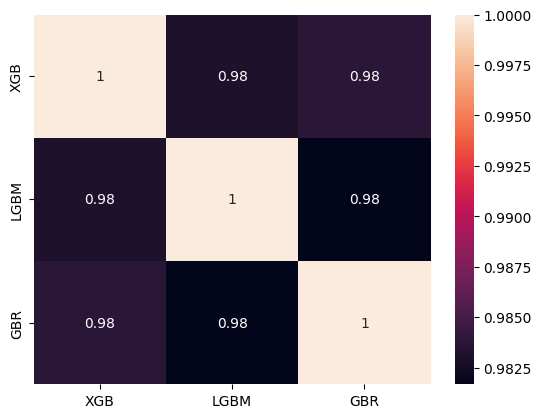

In [136]:
test_Survived_GBR = pd.Series(bestGBR.predict(X_test_rbst), name="GBR")
test_Survived_XGB = pd.Series(bestXGB.predict(X_test_rbst), name="XGB")
test_Survived_LGBM = pd.Series(bestLGBM.predict(X_test_rbst), name="LGBM")

ensemble_results = pd.concat([test_Survived_XGB,test_Survived_LGBM,
                              test_Survived_GBR],axis=1)
g= sns.heatmap(ensemble_results.corr(),annot=True)

In [137]:
# blending (기하평균)
ensemble = np.expm1(0.3*test_Survived_GBR + 0.2*test_Survived_XGB + 0.5*test_Survived_LGBM)
submission2 = pd.DataFrame({
    "Id": test_id.astype(int),
    "SalePrice": ensemble
})
submission2.head()

,Id,SalePrice
0,1461,113033.382272
1,1462,145744.170672
2,1463,172784.637102
3,1464,172858.233909
4,1465,167625.716622


In [138]:
submission2.to_csv('ver2.ensemble.csv', index=False)

In [139]:
MSE_dataFrame

,MSEValue
lasso,0.142987
lassoCV,0.019052
ridge,0.017341
ridgeCV,0.016747
elasticNet,0.142627
elasticNetCV,0.019025
randomForest,0.019352
GBR,0.016282
XGB,0.019063
LGBM,0.016891


In [140]:
pd.DataFrame(pd.Series(data=[-gsLasso.best_score_, -gsRidge.best_score_, -gsElasticNet.best_score_, -gsRandomForestRegressor.best_score_, -gsGBR.best_score_, -gsXGB.best_score_, -gsLGBM.best_score_, -gsSVR.best_score_, -gsKnn.best_score_], name='bestMSEValue', index=['lasso', 'ridge', 'elasticNet', 'randomForest', 'GBR', 'XGB', 'LGBM', 'SVR', 'Knn'])).sort_values(ascending=True, by='bestMSEValue')

,bestMSEValue
GBR,0.014866
XGB,0.015204
lasso,0.016044
elasticNet,0.016062
LGBM,0.016425
SVR,0.016833
ridge,0.017341
randomForest,0.018913
Knn,0.027966


In [141]:
test_Survived_RandomForest = pd.Series(bestRandomForestRegressor.predict(X_test_rbst), name="RandomForest")
test_Survived_Knn = pd.Series(bestKnn.predict(X_test_rbst), name="Knn")

In [142]:
np.expm1(0.9 * test_Survived_RandomForest + 0.1 * test_Survived_Knn)

0       115172.348858
1       159299.435483
2       182039.127129
3       183643.836047
4       194297.068921
            ...      
1454     80249.684418
1455     85195.923099
1456    132382.629829
1457    111838.075929
1458    212817.324640
Length: 1459, dtype: float64

In [143]:
submission3 = pd.DataFrame({
    "Id": test_id.astype(int),
    "SalePrice": np.expm1(0.9 * test_Survived_RandomForest + 0.1 * test_Survived_Knn)
})
submission3.head()

,Id,SalePrice
0,1461,115172.348858
1,1462,159299.435483
2,1463,182039.127129
3,1464,183643.836047
4,1465,194297.068921


In [144]:
submission3.to_csv('ver2.RandomForestAddKnn.csv', index=False)

In [145]:
submission4 = pd.DataFrame({
    "Id": test_id.astype(int),
    "SalePrice": np.expm1(test_Survived_RandomForest)
})
submission4.head()

,Id,SalePrice
0,1461,114456.308012
1,1462,160616.345738
2,1463,182103.966584
3,1464,182502.846784
4,1465,196456.335838


In [146]:
submission4.to_csv('ver2.RandomForest.csv', index=False)